In [8]:
import numpy as np
import pickle
from matplotlib import pyplot as plt
%matplotlib inline

data = {}
for i in range(4):
  with open('./output_%d.pkl' % i, 'rb') as f:
    data.update(pickle.load(f))
print(data.keys())

dict_keys(['itr10_layer4', 'itr0_layer3', 'itr20_layer4', 'itr10_layer3', 'itr20_layer1', 'itr10_layer1', 'itr5_layer4', 'itr9000_layer3', 'itr5_layer1', 'itr1000_layer1', 'itr1000_layer3', 'itr5_layer3', 'itr0_layer1', 'itr1000_layer4', 'itr9000_layer1', 'itr20_layer3', 'itr0_layer4', 'itr9000_layer4'])


Layer | Iter	| I(T;X) | I(T;Y)
----------------------------------
1     |0   	| 3.541  |  0.073
      |5   	| 3.551  |  0.090
      |10   	| 3.625  |  0.090
      |20   	| 3.714  |  0.090
      |1000   	| 3.811  |  0.065
      |9000   	| 3.491  |  0.095
----------------------------------
3     |0   	| 3.269  |  0.067
      |5   	| 3.270  |  0.091
      |10   	| 3.399  |  0.059
      |20   	| 3.476  |  0.047
      |1000   	| 3.064  |  0.094
      |9000   	| 2.360  |  0.096
----------------------------------
4     |0   	| 3.035  |  0.193
      |5   	| 3.628  |  0.232
      |10   	| 3.691  |  0.239
      |20   	| 3.026  |  0.229
      |1000   	| 2.218  |  0.228
      |9000   	| 1.916  |  0.226
----------------------------------


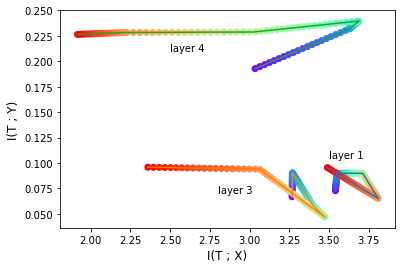

In [119]:
layers = [1, 3, 4]
iters = [0, 5, 10, 20, 1000, 9000]

plt.figure()
plt.set_cmap('rainbow')
print('Layer | Iter\t| I(T;X) | I(T;Y)')
print('-' * 34)
for layer in layers:
  I_ty = [data['itr%d_layer%d' % (i, layer)]['ent'] for i in iters]
  I_tx = [data['itr%d_layer%d' % (i, layer)]['mi'] for i in iters]
  
  t = np.linspace(0, 1, 100)
  itx = np.interp(t, np.linspace(0, 1, len(I_tx)), I_tx)
  ity = np.interp(t, np.linspace(0, 1, len(I_ty)), I_ty)
  plt.scatter(itx, ity, c=t)
  plt.plot(I_tx, I_ty, label='layer %d' % layer)
  for i, (itr, itx, ity) in enumerate(zip(iters, I_tx, I_ty)):
    if i == 0:
      print('%d     |%d   \t| %.3f  |  %.3f' % (layer, itr, itx, ity))
    else:
      print('      |%d   \t| %.3f  |  %.3f' % (itr, itx, ity))
  print('-' * 34)
plt.text(2.8, 0.07, 'layer 3')
plt.text(3.5, 0.105, 'layer 1')
plt.text(2.5, 0.21, 'layer 4')
plt.xlabel('I(T ; X)', fontsize=12)
plt.ylabel('I(T ; Y)', fontsize=12)
plt.savefig('/home/nikhil/fig.png')